In [1]:
# Import libraries

# Pandas for data handling
import pandas # https://pandas.pydata.org/
# from pandas.plotting import scatter_matrix

# pretty tables
from IPython.display import display

# NumPy for numerical computing
import numpy # https://numpy.org/

# MatPlotLib+Seaborn for visualization
import matplotlib.pyplot as pl  # https://matplotlib.org/
import seaborn as sns

# assessment
from sklearn import model_selection # for model comparisons
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# data preprocessing / feature selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# combining
from sklearn.pipeline import make_pipeline

#########

In [2]:
print('Loading data from file ...')  # Now let's load the data
dataset = pandas.read_csv('winequality-white.csv') # default is header=infer, change if column names are not in first row
print('done \n')

print('Removing rows with missing data ...')  # Make things simple
dataset = dataset.dropna()  # default is to drop any row that contains at least one missing value
print('done \n')

Loading data from file ...
done 

Removing rows with missing data ...
done 



In [3]:
# Table that summarizes the dataset statistics for winequality-white for question 1

print('Summary of the dataset')   
display(dataset.describe(include='all'))
print('\n')

Summary of the dataset


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [4]:
# Let's set up a problem: Can we predict 'quality' using these three features: 'fixed acidity', 'alcohol', 'pH' ?

print('Reading list of problem variables X and Y...')
X_name = [ 'fixed acidity', 'alcohol', 'pH' ] # columns to focus on as predictors
X = dataset[X_name]   # only keep these columns as features
y_name = 'quality'     # column to focus on as target
y = dataset[y_name]   # only keep this column as label 
print('done \n')

# Split-out test dataset

# We reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.
seed = 27

# Train, test split
print('Partitioning data into parts: formative (for development) and summative (for testing) ...')
test_size = 0.20   # means 20 percent

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
print('done \n')

Reading list of problem variables X and Y...
done 

Partitioning data into parts: formative (for development) and summative (for testing) ...
done 



,fixed acidity,alcohol,pH
count,3918.000000,3918.000000,3918.000000
mean,6.863055,10.512363,3.186575
std,0.850247,1.220276,0.152203
min,3.800000,8.400000,2.720000
25%,6.300000,9.500000,3.080000
50%,6.800000,10.400000,3.175000
75%,7.300000,11.400000,3.280000
max,14.200000,14.200000,3.820000


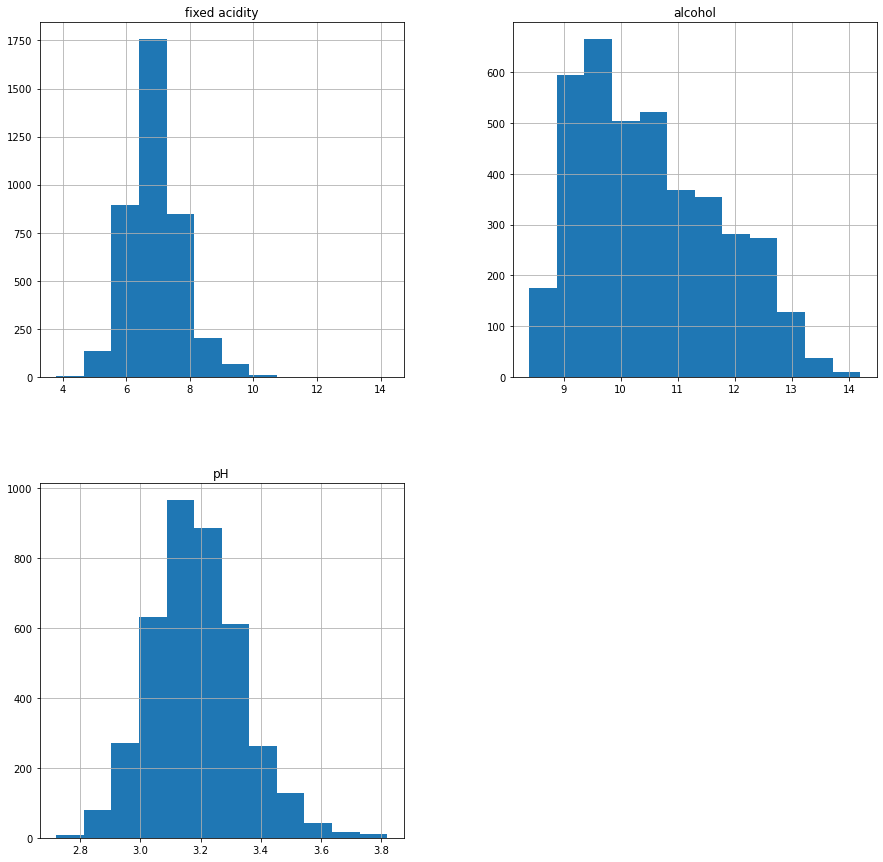

count    3918.000000
mean        5.866769
std         0.889684
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [5]:
display(X_train.describe(include='all'))
X_train.hist(figsize=(15, 15), bins=12)  # bins ~= sqrt(N)
pl.show()

display(y_train.describe(include='all'))

In [6]:
#Will take the two models that have been chosen to be tested
print('Reading list of algorithms to train ...')
models = []
models.append(( 'SVM', SVC(C=1000) )) #Kernel default is rfb and what we will be using
models.append(( 'DT', DecisionTreeClassifier(max_depth=6) ))
print('done \n')

Reading list of algorithms to train ...
done 



In [7]:
print('Reading list of scoring methods to use during model development ...')
scoring = 'accuracy'
print('done \n')

Reading list of scoring methods to use during model development ...
done 



In [8]:
# Now it is time to develop (train and validate) the models on the formative data set there will be two models

k4folds = 5   # This will split our formative dataset into five parts;
results = []
names = []
for name, model in models:   # Select each model in turn
    print(" ++ NOW WORKING ON ALGORITHM %s ++" % name)
    print("Splitting data into %s folds" % k4folds)
    kfold = model_selection.KFold(n_splits=k4folds, random_state=seed, shuffle=True)   # fit the model using four parts at a time and then validate it on the oher part that was set aside; and repeat five times.
    print("Training model on each split")
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "algorithm %s %s results: mean = %f (std = %f)" % (name, scoring, cv_results.mean(), cv_results.std())
    print(msg)
    
print('done \n') 

 ++ NOW WORKING ON ALGORITHM SVM ++
Splitting data into 5 folds
Training model on each split
algorithm SVM accuracy results: mean = 0.494650 (std = 0.018051)
 ++ NOW WORKING ON ALGORITHM DT ++
Splitting data into 5 folds
Training model on each split
algorithm DT accuracy results: mean = 0.498477 (std = 0.016115)
done 



In [9]:
#Tuning the SVC model
selected_model = SVC()
hyperparameters = {'C':[0.01, 0.1, 1, 10, 100], 'class_weight':[None, 'balanced'] }

print("Now tuning hyperparameters...")
clf = GridSearchCV(selected_model, hyperparameters, cv=5, scoring=scoring)
clf.fit(X_train, y_train)

print("Best hyperparameters found on development set:")
print(clf.best_params_)
print("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print('done \n')

tuned_model = clf.best_estimator_

Now tuning hyperparameters...


/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters found on development set:
{'C': 10, 'class_weight': None}
Grid scores on development set:
0.441 (+/-0.001) for {'C': 0.01, 'class_weight': None}
0.277 (+/-0.095) for {'C': 0.01, 'class_weight': 'balanced'}
0.490 (+/-0.026) for {'C': 0.1, 'class_weight': None}
0.295 (+/-0.038) for {'C': 0.1, 'class_weight': 'balanced'}
0.490 (+/-0.027) for {'C': 1, 'class_weight': None}
0.334 (+/-0.052) for {'C': 1, 'class_weight': 'balanced'}
0.492 (+/-0.027) for {'C': 10, 'class_weight': None}
0.294 (+/-0.044) for {'C': 10, 'class_weight': 'balanced'}
0.491 (+/-0.019) for {'C': 100, 'class_weight': None}
0.290 (+/-0.046) for {'C': 100, 'class_weight': 'balanced'}
done 



In [10]:
#Tuning the DT model
selected_model2 = DecisionTreeClassifier()
hyperparameters = {'max_depth':[5, 6, 7, 8, 9], 'criterion':['gini', 'entropy'] }

print("Now tuning hyperparameters...")
clf = GridSearchCV(selected_model2, hyperparameters, cv=5, scoring=scoring)
clf.fit(X_train, y_train)

print("Best hyperparameters found on development set:")
print(clf.best_params_)
print("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print('done \n')

tuned_model = clf.best_estimator_

Now tuning hyperparameters...


/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters found on development set:
{'criterion': 'gini', 'max_depth': 8}
Grid scores on development set:
0.496 (+/-0.021) for {'criterion': 'gini', 'max_depth': 5}
0.495 (+/-0.031) for {'criterion': 'gini', 'max_depth': 6}
0.497 (+/-0.038) for {'criterion': 'gini', 'max_depth': 7}
0.504 (+/-0.026) for {'criterion': 'gini', 'max_depth': 8}
0.497 (+/-0.039) for {'criterion': 'gini', 'max_depth': 9}
0.500 (+/-0.028) for {'criterion': 'entropy', 'max_depth': 5}
0.493 (+/-0.026) for {'criterion': 'entropy', 'max_depth': 6}
0.484 (+/-0.018) for {'criterion': 'entropy', 'max_depth': 7}
0.498 (+/-0.018) for {'criterion': 'entropy', 'max_depth': 8}
0.492 (+/-0.036) for {'criterion': 'entropy', 'max_depth': 9}
done 



In [11]:
#Comparison of SVC model to scaled model
raw_SVM = SVC(C=10, class_weight=None)  #Kernel default is rfb and what we will be using
raw_SVM.fit(X_train, y_train)
print("Detailed classification report:")
print('\n')
y_true, y_pred = y_test, raw_SVM.predict(X_test)
print(classification_report(y_true, y_pred))
print('done \n')

scaled_SVM = make_pipeline( MinMaxScaler(), SVC(C=10, class_weight=None) )  
scaled_SVM.fit(X_train, y_train)
print("Detailed classification report:")
print('\n')
y_true, y_pred = y_test, scaled_SVM.predict(X_test)
print(classification_report(y_true, y_pred))
print('done \n')

Detailed classification report:




/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        27
           5       0.49      0.53      0.51       264
           6       0.53      0.76      0.63       471
           7       0.67      0.09      0.16       175
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00         1

    accuracy                           0.52       980
   macro avg       0.24      0.20      0.19       980
weighted avg       0.51      0.52      0.47       980

done 

Detailed classification report:


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        27
           5       0.49      0.60      0.54       264
           6       0.54      0.69      0.61       471
           7       0.50      0.16      0.24       175
           8       0.00      0.00    

/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [12]:
#Comparison of DT model to scaled model
raw_DT = DecisionTreeClassifier(criterion='gini', max_depth=8 ) 
raw_DT.fit(X_train, y_train)
print("Detailed classification report:")
print('\n')
y_true, y_pred = y_test, raw_DT.predict(X_test)
print(classification_report(y_true, y_pred))
print('done \n')

scaled_DT = make_pipeline( MinMaxScaler(), DecisionTreeClassifier(criterion='gini', max_depth=8 ) )  
scaled_DT.fit(X_train, y_train)
print("Detailed classification report:")
print('\n')
y_true, y_pred = y_test, scaled_DT.predict(X_test)
print(classification_report(y_true, y_pred))
print('done \n')

Detailed classification report:


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.67      0.07      0.13        27
           5       0.47      0.55      0.51       264
           6       0.56      0.64      0.59       471
           7       0.53      0.37      0.43       175
           8       0.25      0.03      0.05        38
           9       0.00      0.00      0.00         1

    accuracy                           0.52       980
   macro avg       0.35      0.24      0.25       980
weighted avg       0.52      0.52      0.51       980

done 

Detailed classification report:


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.67      0.07      0.13        27
           5       0.47      0.55      0.51       264
           6       0.55      0.64      0.59       471
           7       0.53      0.37      0.43       175
   

/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [13]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
print("Detailed classification report:")
print('\n')
y_true, y_pred = y_test, dummy.predict(X_test)
print(classification_report(y_true, y_pred))
print('done \n')

Detailed classification report:


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        27
           5       0.00      0.00      0.00       264
           6       0.48      1.00      0.65       471
           7       0.00      0.00      0.00       175
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00         1

    accuracy                           0.48       980
   macro avg       0.07      0.14      0.09       980
weighted avg       0.23      0.48      0.31       980

done 



/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta